In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [6]:
measurements = pd.read_csv('Data/lowVoltage.csv')

#compute time column
increment = measurements['Increment'][0]
time = np.linspace(0, increment*(len(measurements)-2), len(measurements)-1)

#remove line 0 of measurements_1
measurements = measurements.drop(0)
#remove coloum X, Start, Increment and Unnamed: 5
measurements = measurements.drop(columns=['X', 'Start', 'Increment', 'Unnamed: 7'])

#add time column
measurements['Time'] = time

#transform column CH1, CH2, CH3 and CH4 to float
measurements['CH1'] = measurements['CH1'].astype(float)
measurements['CH2'] = measurements['CH2'].astype(float) 
measurements['CH3'] = measurements['CH3'].astype(float)
measurements['CH4'] = measurements['CH4'].astype(float)

display(measurements)

,CH1,CH2,CH3,CH4,Time
1,-0.16,0.24,-4.96,6.56,0.00000
2,-0.28,0.28,-5.92,7.20,0.00005
3,-0.16,0.24,-5.28,6.56,0.00010
4,-0.28,0.32,-5.92,7.20,0.00015
5,-0.24,0.24,-5.28,6.88,0.00020
...,...,...,...,...,...
1196,-0.16,0.28,-5.44,6.72,0.05975
1197,-0.12,0.20,-4.80,6.72,0.05980
1198,-0.20,0.28,-5.60,7.36,0.05985
1199,-0.20,0.24,-4.96,7.20,0.05990


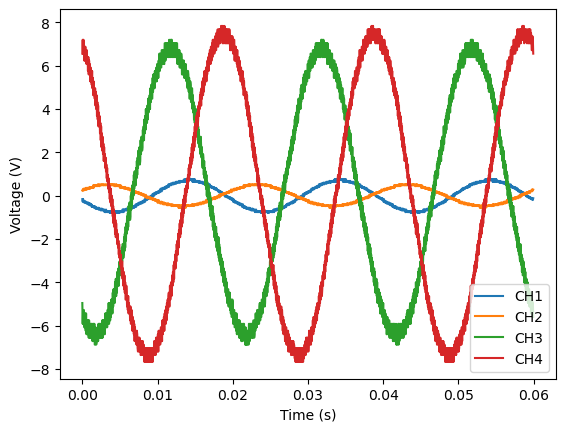

In [7]:
#plot CH1, CH2, CH3 and CH4
plt.plot(measurements['Time'], measurements['CH1'], label='CH1')
plt.plot(measurements['Time'], measurements['CH2'], label='CH2')
plt.plot(measurements['Time'], measurements['CH3'], label='CH3')
plt.plot(measurements['Time'], measurements['CH4'], label='CH4')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()


Max CH1: 0.76
Max CH2: 0.52
Max CH3: 7.2
Max CH4: 7.84


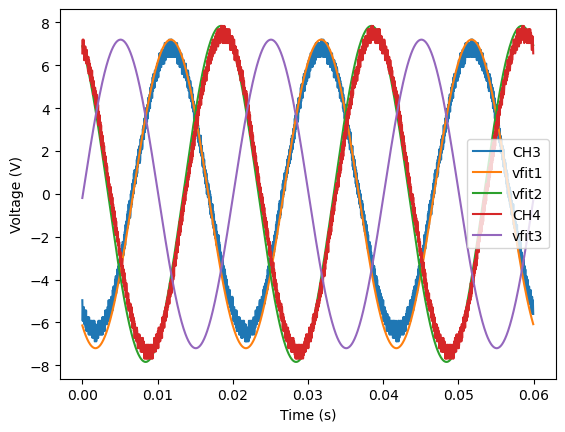

In [13]:
#display max CH1, CH2, CH3 and CH4
print('Max CH1:', measurements['CH1'].max())
print('Max CH2:', measurements['CH2'].max())
print('Max CH3:', measurements['CH3'].max())
print('Max CH4:', measurements['CH4'].max())

wt=50*2*math.pi
delta = -math.pi-0.55

measurements['vfit1'] = measurements.apply(lambda row: measurements['CH3'].max()*math.cos(wt*row['Time']+delta), axis=1)
measurements['vfit2'] = measurements.apply(lambda row: measurements['CH4'].max()*math.cos(wt*row['Time']+delta-2*math.pi/3), axis=1)
measurements['vfit3'] = measurements.apply(lambda row: measurements['CH3'].max()*math.cos(wt*row['Time']+delta-4*math.pi/3), axis=1)

#new plot Ch3 and vfit1
plt.figure()
plt.plot(measurements['Time'], measurements['CH3'], label='CH3')
plt.plot(measurements['Time'], measurements['vfit1'], label='vfit1')
plt.plot(measurements['Time'], measurements['vfit2'], label='vfit2')
plt.plot(measurements['Time'], measurements['CH4'], label='CH4')
plt.plot(measurements['Time'], measurements['vfit3'], label='vfit3')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

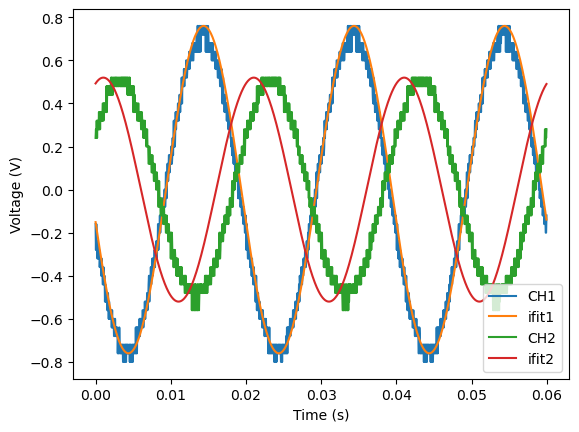

In [31]:
deltai = math.pi/2 + 0.2

measurements['ifit1'] = measurements.apply(lambda row: measurements['CH1'].max()*math.cos(wt*row['Time']+deltai), axis=1)
measurements['ifit2'] = measurements.apply(lambda row: measurements['CH2'].max()*math.cos(wt*row['Time']+deltai-2*math.pi/3), axis=1)

#plot CH1 and ifit1
plt.figure()
plt.plot(measurements['Time'], measurements['CH1'], label='CH1')
plt.plot(measurements['Time'], measurements['ifit1'], label='ifit1')
plt.plot(measurements['Time'], measurements['CH2'], label='CH2')
plt.plot(measurements['Time'], measurements['ifit2'], label='ifit2')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()